In [29]:
import mne
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [30]:
import pandas as pd

# Training
unfiltered_subjects = ['Aanand_19_01.csv','subhojit_24_02.csv','Abhijeet_6205876348.csv','Nishkarsh_22_01.csv','Aanand_19_02.csv',
                       'Deepanshu_21_1.csv',  'Deepanshu_21_02.csv', 'Mantavya_20_01.csv', 'subhojit_24_01.csv',  'Adit_18_02.csv',
                       'Mantavya_20_02.csv','Dipanjan_21_01.csv', 'Pritesh_22_01.csv', 'Rishab_20_02.csv', 'mohitt.csv',
                       'Rishab_20_01.csv', 'Ritwik_23_02.csv', 'Dipanjan_21_02.csv', 'Nishkarsh_22_02.csv','Pritesh_22_02.csv']
sfreq = 120
ch_names = ['timestamps','Fp1','Fp2','C3','C4','P7','P8','O1','O2','F7','F8','F3','F4',
            'T7','T8','P3','P4','stim','sfreq']

all_data = pd.DataFrame(columns=ch_names)

for file_name in unfiltered_subjects:
    df = pd.read_csv(file_name)  # Specify index column
    df['timestamps'] = df['timestamps'] - df['timestamps'][0]
    
    lvl1_sub = df[(df['timestamps'] >= 0) & (df['timestamps'] < 150)].copy()
    lvl2_sub = df[(df['timestamps'] >= 150) & (df['timestamps'] < 280)].copy()
    lvl3_sub = df[(df['timestamps'] >= 280) & (df['timestamps'] < 400)].copy()

    lvl1_sub['label'] = 1
    lvl2_sub['label'] = 2
    lvl3_sub['label'] = 3
    
    combined_df = pd.concat([lvl1_sub, lvl2_sub, lvl3_sub])
    all_data = pd.concat([all_data, combined_df])


testing_subjects = ['Achal_19_01.csv','Ritwik_23_01.csv']
testing_data = pd.DataFrame(columns=ch_names)

for file_name in testing_subjects:
    df = pd.read_csv(file_name)  # Specify index column
    df['timestamps'] = df['timestamps'] - df['timestamps'][0]
    
    lvl1_sub = df[(df['timestamps'] >= 10) & (df['timestamps'] < 90)].copy()
    lvl2_sub = df[(df['timestamps'] >= 180) & (df['timestamps'] < 260)].copy()
    lvl3_sub = df[(df['timestamps'] >= 300) & (df['timestamps'] < 400)].copy()

    lvl1_sub['label'] = 1
    lvl2_sub['label'] = 2
    lvl3_sub['label'] = 3
    
    combined_df = pd.concat([lvl1_sub, lvl2_sub, lvl3_sub])
    testing_data = pd.concat([testing_data, combined_df])


C:\Users\LEGION\AppData\Local\Temp\ipykernel_13024\649320829.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, combined_df])
C:\Users\LEGION\AppData\Local\Temp\ipykernel_13024\649320829.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testing_data = pd.concat([testing_data, combined_df])


In [31]:
drop1 = all_data.drop(['sfreq'], axis=1)
df1 = drop1.drop(['stim'], axis=1)
df = df1.drop(['label'], axis=1)

drop_data = testing_data.drop(['sfreq'], axis=1)
df2 = drop_data.drop(['stim'], axis=1)
testing = df2.drop(['label'], axis=1)

In [32]:
eeg_data = df.iloc[:,1:18].values.T
eeg_data[:-1] = eeg_data[:-1] * (10*(-6))
eeg_data[:-1] = eeg_data[:-1] / 4

ch_names = ['Fp1',	'Fp2'	,'C3'	,'C4'	,'P7'	,'P8'	,'O1'	,'O2'	,'F7'	,'F8'	,'F3'	,'F4'	,'T7'	,'T8'	,'P3'	,'P4']
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = ( ["eeg" ]*16))
raw = mne.io.RawArray(eeg_data, info)
raw.set_eeg_reference()

raw.filter(l_freq = 1,h_freq = 30)

Creating RawArray with float64 data, n_channels=16, n_times=940977
    Range : 0 ... 940976 =      0.000 ...  7841.467 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 397 samples (3.308 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,120.00 Hz
Highpass,1.00 Hz
Lowpass,30.00 Hz


In [33]:
import mne

# EEG data preprocessing for testing
testing_eeg_data = testing.iloc[:, 1:18].values.T  # Selecting EEG channels only
testing_eeg_data[:-1] = testing_eeg_data[:-1] * (10 ** (-6))  # Convert to microvolts
testing_eeg_data[:-1] = testing_eeg_data[:-1] / 4  # Divide by 4

# Create channel names
ch_names = ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'F3', 'F4', 'T7', 'T8', 'P3', 'P4']

info_testing = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=["eeg"] * 16)
raw_testing = mne.io.RawArray(testing_eeg_data, info_testing)
raw_testing.set_eeg_reference()
raw_testing.filter(l_freq=1, h_freq=30)


Creating RawArray with float64 data, n_channels=16, n_times=58146
    Range : 0 ... 58145 =      0.000 ...   484.542 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)


- Filter length: 397 samples (3.308 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,120.00 Hz
Highpass,1.00 Hz
Lowpass,30.00 Hz


In [34]:
duration = 0.6
epochs=mne.make_fixed_length_epochs(raw, duration = duration, overlap=0,preload=True)

Not setting metadata
13069 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 13069 events and 72 original time points ...
0 bad epochs dropped


In [35]:
# Define epoch duration
duration = 0.6

# Create fixed-length epochs for testing data
testing_epochs = mne.make_fixed_length_epochs(raw_testing, duration=duration, overlap=0, preload=True)


Not setting metadata
807 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 807 events and 72 original time points ...
0 bad epochs dropped


In [36]:
epochs.drop_bad()  # This will drop bad epochs
num_epochs = len(epochs)
print("Total number of epochs created:", num_epochs)

Total number of epochs created: 13069


In [37]:
testing_epochs.drop_bad()  # This will drop bad epochs
testing_num_epochs = len(testing_epochs)
print("Total number of epochs created for testing:", testing_num_epochs)

Total number of epochs created for testing: 807


In [38]:
import mne

eeg_data = epochs.get_data()

condition_ranges = {'lev1': (0, (num_epochs/3)),
                    'lev2': ((num_epochs/3) , 2*((num_epochs)/3) ),
                    'lev3': ( 2*((num_epochs)/3) , (num_epochs) )}

epochs_by_condition = {}
selected_epochs = []

for condition, (start_epoch, end_epoch) in condition_ranges.items():
    start_epoch = int(start_epoch)
    end_epoch = int(end_epoch)
    condition_epochs = epochs[start_epoch:end_epoch+1].copy()
    epochs_by_condition[condition] = condition_epochs
    selected_epochs.append(condition_epochs)

selected_epochs = mne.concatenate_epochs(selected_epochs)

for condition, epoch_data in epochs_by_condition.items():
    num_epochs = len(epoch_data)
    print(f"Number of epochs for {condition}: {num_epochs}")

print(f"Total number of selected epochs: {len(selected_epochs)}")


C:\Users\LEGION\AppData\Local\Temp\ipykernel_13024\3628746636.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()


Not setting metadata
13071 matching events found
No baseline correction applied
Number of epochs for lev1: 4357
Number of epochs for lev2: 4357
Number of epochs for lev3: 4357
Total number of selected epochs: 13071


In [39]:

condition_of_interest = 'lev1'
epoch_array_for_condition = epochs_by_condition[condition_of_interest]
print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


Epoch array shape for condition lev1: (4357, 16, 72)


C:\Users\LEGION\AppData\Local\Temp\ipykernel_13024\1489624503.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


In [40]:
# Define condition ranges based on the number of epochs in the testing data
num_epochs = len(testing_epochs)
condition_ranges_testing = {
    'lev1': (0, num_epochs // 3),
    'lev2': (num_epochs // 3, 2 * (num_epochs // 3)),
    'lev3': (2 * (num_epochs // 3), num_epochs)
}

epochs_by_condition_testing = {}
selected_epochs_testing = []

# Iterate over condition ranges and select epochs for each condition
for condition, (start_epoch, end_epoch) in condition_ranges_testing.items():
    start_epoch = int(start_epoch)
    end_epoch = int(end_epoch)
    condition_epochs = testing_epochs[start_epoch:end_epoch].copy()
    epochs_by_condition_testing[condition] = condition_epochs
    selected_epochs_testing.append(condition_epochs)

# Concatenate epochs from different conditions into a single Epochs object
selected_epochs_testing = mne.concatenate_epochs(selected_epochs_testing)

# Print the number of epochs for each condition
for condition, epoch_data in epochs_by_condition_testing.items():
    num_epochs_condition = len(epoch_data)
    print(f"Number of epochs for {condition}: {num_epochs_condition}")

# Print the total number of selected epochs
print(f"Total number of selected epochs for testing: {len(selected_epochs_testing)}")


Not setting metadata
807 matching events found
No baseline correction applied
Number of epochs for lev1: 269
Number of epochs for lev2: 269
Number of epochs for lev3: 269
Total number of selected epochs for testing: 807


In [41]:
import pandas as pd
import numpy as np
from scipy.signal import welch



def calculate_psd_features(epoch_data, sfreq):
    psd_frequencies, psd_values = welch(epoch_data, fs=sfreq)
    psd_means = np.mean(psd_values, axis=1)  # Calculate mean PSD values for each channel
    psd_variances = np.var(psd_values, axis=1)  # Calculate variance of PSD values for each channel
    psd_std_devs = np.std(psd_values, axis=1)  # Calculate standard deviation of PSD values for each channel

    freq_min = 14
    freq_max = 30

    # Find the indices corresponding to the frequency range of interest
    idx_min = np.argmax(psd_frequencies > freq_min) - 1
    idx_max = np.argmax(psd_frequencies > freq_max)

    # Extract the PSD within the specified frequency range
    psd_values_alpha_band = psd_values[:, idx_min:idx_max]
    psd_means_alpha_band = np.mean(psd_values_alpha_band, axis=1)  # Calculate mean PSD values in alpha band for each channel
    psd_variances_alpha_band = np.var(psd_values_alpha_band, axis=1)  # Calculate variance of PSD values in alpha band for each channel
    psd_std_devs_alpha_band = np.std(psd_values_alpha_band, axis=1)  # Calculate standard deviation of PSD values in alpha band for each channel
    return psd_means_alpha_band, psd_variances_alpha_band, psd_std_devs_alpha_band

channel_names = epochs.ch_names
sfreq = epochs.info['sfreq']  # Sampling frequency

columns = [f'{feature}_{channel}' for feature in ['mean_psd', 'variance_psd', 'standarddev_psd'] for channel in channel_names]
columns.append('condition')
feature_df = pd.DataFrame(columns=columns)

def append_epoch_data(epoch_array, condition_label):
    global feature_df
    for epoch in epoch_array:
        psd_means, psd_variances, psd_std_devs = calculate_psd_features(epoch, sfreq)
        epoch_features = np.concatenate([psd_means, psd_variances, psd_std_devs])
        epoch_features = np.append(epoch_features, condition_label)
        epoch_df = pd.DataFrame([epoch_features], columns=columns)
        feature_df = pd.concat([feature_df, epoch_df], ignore_index=True)

append_epoch_data(epochs_by_condition['lev1'], 'lev1')
append_epoch_data(epochs_by_condition['lev2'], 'lev2')
append_epoch_data(epochs_by_condition['lev3'], 'lev3')

print("Shape of feature DataFrame:", feature_df.shape)
print(feature_df.head())


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 72, using nperseg = 72
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of feature DataFrame: (13071, 49)
         mean_psd_Fp1       mean_psd_Fp2         mean_psd_C3  \
0   5512.369895133467  7468.764680506607  4578.8885067972615   
1   4234.727236419005  5870.520673380197   4043.936215107492   
2  3800.1082573177932  5408.885491299386   3377.761748504354   
3  4606.4898499409765  5050.572755186192   3450.141006539079   
4  2600.6593104103436  4272.618055791072   2993.663082898885   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  2835.5387849238946   6350.195010816803  4859.4610882782845   
1  2452.9395267930727   4927.823978237707   4308.861778029582   
2  2024.3218713156114  3658.0347706777616  3427.3149541238968   
3  1899.5756042208568  3784.4448887433027   3626.653281937911   
4  1773.1110979720042   3074.766775518717   2625.900341410021   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   7079.589898375131   4271.797098756459   3549.619212728695   
1   9540.018561123077  3576.1924305012435  3105.625814

In [42]:
# Rename columns using a dictionary
new_column_names = {
    'mean_psd_Fp1': 'mean_psd_Fp1',
    'mean_psd_Fp2': 'mean_psd_Fp2',
    'mean_psd_C3': 'mean_psd_C3',
    'mean_psd_C4': 'mean_psd_C4',
    'mean_psd_P7': 'mean_psd_P7',
    'mean_psd_P8': 'mean_psd_P8',
    'mean_psd_O1': 'mean_psd_O1',
    'mean_psd_O2': 'mean_psd_O2',
    'mean_psd_F7': 'mean_psd_F7',
    'mean_psd_F8': 'mean_psd_F8',
    'standarddev_psd_Fp1': 'stddev_psd_Fp1',
    'standarddev_psd_Fp2': 'stddev_psd_Fp2',
    'standarddev_psd_C3': 'stddev_psd_C3',
    'standarddev_psd_C4': 'stddev_psd_C4',
    'standarddev_psd_P7': 'stddev_psd_P7',
    'standarddev_psd_P8': 'stddev_psd_P8',
    'standarddev_psd_O1': 'stddev_psd_O1',
    'standarddev_psd_O2': 'stddev_psd_O2',
    'standarddev_psd_F7': 'stddev_psd_F7',
    'standarddev_psd_F8': 'stddev_psd_F8'
}

# Rename columns using the rename() method
feature_df.rename(columns=new_column_names, inplace=True)

# Print the DataFrame
print(feature_df.head())


         mean_psd_Fp1       mean_psd_Fp2         mean_psd_C3  \
0   5512.369895133467  7468.764680506607  4578.8885067972615   
1   4234.727236419005  5870.520673380197   4043.936215107492   
2  3800.1082573177932  5408.885491299386   3377.761748504354   
3  4606.4898499409765  5050.572755186192   3450.141006539079   
4  2600.6593104103436  4272.618055791072   2993.663082898885   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  2835.5387849238946   6350.195010816803  4859.4610882782845   
1  2452.9395267930727   4927.823978237707   4308.861778029582   
2  2024.3218713156114  3658.0347706777616  3427.3149541238968   
3  1899.5756042208568  3784.4448887433027   3626.653281937911   
4  1773.1110979720042   3074.766775518717   2625.900341410021   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   7079.589898375131   4271.797098756459   3549.619212728695   
1   9540.018561123077  3576.1924305012435  3105.6258140918358   
2  4033.9871105526818  2893.0

In [43]:
feature_df

,mean_psd_Fp1,mean_psd_Fp2,mean_psd_C3,mean_psd_C4,mean_psd_P7,mean_psd_P8,mean_psd_O1,mean_psd_O2,mean_psd_F7,mean_psd_F8,...,stddev_psd_O2,stddev_psd_F7,stddev_psd_F8,standarddev_psd_F3,standarddev_psd_F4,standarddev_psd_T7,standarddev_psd_T8,standarddev_psd_P3,standarddev_psd_P4,condition
0,5512.369895133467,7468.764680506607,4578.8885067972615,2835.5387849238946,6350.195010816803,4859.4610882782845,7079.589898375131,4271.797098756459,3549.619212728695,9176.999350314976,...,8282.9169611084,5929.9629943869395,18481.597126613553,21858.117437977256,3777.0897268642657,21503.732773410316,31996.53661819277,22696.283793872986,16659.3064521424,lev1
1,4234.727236419005,5870.520673380197,4043.936215107492,2452.9395267930727,4927.823978237707,4308.861778029582,9540.018561123077,3576.1924305012435,3105.6258140918358,8067.570836622922,...,6996.919626438105,5401.825081102116,15260.659426082988,18494.286307198436,3201.9634209852907,18549.151013310042,2487.371844500067,19330.958544694062,2162.140285683822,lev1
2,3800.1082573177932,5408.885491299386,3377.761748504354,2024.3218713156114,3658.0347706777616,3427.3149541238968,4033.9871105526818,2893.0944790323165,2375.9406927068376,6814.440864621692,...,5289.308875257017,3687.0598571262185,13214.47954625298,16529.378128367418,2029.3964641283278,16151.99542238811,1472.584601404371,16820.609850698263,1317.1401770684179,lev1
3,4606.4898499409765,5050.572755186192,3450.141006539079,1899.5756042208568,3784.4448887433027,3626.653281937911,4956.599330244578,2950.401929694715,2697.575284302093,5768.828273322669,...,5839.634463252912,5007.553142159767,11306.1271380822,13768.108128719525,3881.330228709602,13578.681772936594,2347.975811120148,13790.030608309058,2635.244382866,lev1
4,2600.6593104103436,4272.618055791072,2993.663082898885,1773.1110979720042,3074.766775518717,2625.900341410021,5415.080899546827,2155.117823487809,1922.7232970920675,5743.52068117045,...,4170.000211188462,2694.4199910351153,11138.277029997074,13542.806052126021,1351.724743594396,14016.754270053347,1227.597757497885,14545.22012723503,960.746833299487,lev1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13066,960.7177207180101,949.4953171811936,964.5690397730857,1008.6427000294821,984.9870755591368,2249.8781593092212,977.5683684277993,987.2849023270726,1112.1757196253348,8001.926198348054,...,770.4886244421973,867.6671933848615,5708.4333015290085,1932.9323944519535,2029.004935645826,5203.292655337313,1982.016688736181,1931.745261798375,2955.8197766077496,lev3
13067,2132.275271382033,2136.0481800371995,2116.037107563684,2130.1552798253756,2133.002481854171,5193.914506528008,2043.0654532242313,2165.4796083482206,3293.10989228009,7239.660806732645,...,1848.658615798003,3016.5267745889223,5529.360013867604,5300.234297351343,5291.27402541401,5262.405238911937,5460.766115294265,5408.9554965829775,9820.304049141121,lev3
13068,1525.9370355014698,1531.0432252580008,1518.2353499109051,1495.591352384319,1586.7367117657311,2899.8819512110963,1331.2923062719556,1531.8736756014441,2350.5050110441757,3652.191704693527,...,1060.160728483973,1941.9580464861267,2905.090413727828,2799.2625480544716,5048.106025118453,6734.913255649398,2727.322841392959,2777.2910418992433,5473.210348252561,lev3
13069,2080.5936792053412,2075.496008553606,2040.4324824619216,2064.278910987199,2106.8402203901837,4216.359907424312,2019.7722122843304,2040.9130548347318,3481.3883324212406,6358.806718619704,...,1408.3060280182353,3832.7107464635133,3899.146779769047,3764.0201003735724,4109.665728992371,4281.832653712997,2451.8867867203116,3700.031159499494,6317.281293121599,lev3


In [44]:
# Create a DataFrame to store the features extracted from testing epochs
feature_columns = [f'{feature}_{channel}' for feature in ['mean_psd', 'variance_psd', 'standarddev_psd'] for channel in ch_names]
feature_columns.append('condition')  # Add a column for condition labels
testing_feature_df = pd.DataFrame(columns=feature_columns)

# Function to calculate PSD features for testing epochs
def append_testing_epoch_data(epoch_array, condition_label):
    global testing_feature_df
    for epoch in epoch_array:
        psd_means, psd_variances, psd_std_devs = calculate_psd_features(epoch, sfreq)
        epoch_features = np.concatenate([psd_means, psd_variances, psd_std_devs])
        epoch_features = np.append(epoch_features, condition_label)
        epoch_df = pd.DataFrame([epoch_features], columns=feature_columns)
        testing_feature_df = pd.concat([testing_feature_df, epoch_df], ignore_index=True)

# Apply the feature extraction function to testing epochs for each condition
append_testing_epoch_data(epochs_by_condition_testing['lev1'], 'lev1')
append_testing_epoch_data(epochs_by_condition_testing['lev2'], 'lev2')
append_testing_epoch_data(epochs_by_condition_testing['lev3'], 'lev3')

# Print the shape and first few rows of the testing feature DataFrame
print("Shape of testing feature DataFrame:", testing_feature_df.shape)
print(testing_feature_df.head())


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 72, using nperseg = 72
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of testing feature DataFrame: (807, 49)
           mean_psd_Fp1          mean_psd_Fp2           mean_psd_C3  \
0   0.04239833015625566   0.04239834639545974  0.042398340336458645   
1  0.016822087396385115  0.016822094269049678  0.016822086821315033   
2  0.009600383680736619  0.009600394036725766  0.009600386169948998   
3  0.016351245459510274  0.016351257231996055  0.016351245036358417   
4   0.00615507403547462  0.006155072909108814  0.006155070001453949   

             mean_psd_C4            mean_psd_P7           mean_psd_P8  \
0    0.04239833914104005   0.042398392746926666  0.042398345840275124   
1    0.01682207229513797    0.01682208623358466  0.016822098940331976   
2   0.009600384216052357   0.009600381180564678  0.009600381122960282   
3    0.01635123752298921   0.016351301642956152  0.016351249367365293   
4  0.0061550705663853825  0.0061550999601178305  0.006155075799354056   

            mean_psd_O1           mean_psd_O2           mean_psd_F7  \
0   0.04239833593

In [45]:
# Rename columns using a dictionary
new_column_names = {
    'mean_psd_Fp1': 'mean_psd_Fp1',
    'mean_psd_Fp2': 'mean_psd_Fp2',
    'mean_psd_C3': 'mean_psd_C3',
    'mean_psd_C4': 'mean_psd_C4',
    'mean_psd_P7': 'mean_psd_P7',
    'mean_psd_P8': 'mean_psd_P8',
    'mean_psd_O1': 'mean_psd_O1',
    'mean_psd_O2': 'mean_psd_O2',
    'mean_psd_F7': 'mean_psd_F7',
    'mean_psd_F8': 'mean_psd_F8',
    'standarddev_psd_Fp1': 'stddev_psd_Fp1',
    'standarddev_psd_Fp2': 'stddev_psd_Fp2',
    'standarddev_psd_C3': 'stddev_psd_C3',
    'standarddev_psd_C4': 'stddev_psd_C4',
    'standarddev_psd_P7': 'stddev_psd_P7',
    'standarddev_psd_P8': 'stddev_psd_P8',
    'standarddev_psd_O1': 'stddev_psd_O1',
    'standarddev_psd_O2': 'stddev_psd_O2',
    'standarddev_psd_F7': 'stddev_psd_F7',
    'standarddev_psd_F8': 'stddev_psd_F8'
}

# Rename columns using the rename() method
testing_feature_df.rename(columns=new_column_names, inplace=True)

# Print the DataFrame
print(testing_feature_df.head())


           mean_psd_Fp1          mean_psd_Fp2           mean_psd_C3  \
0   0.04239833015625566   0.04239834639545974  0.042398340336458645   
1  0.016822087396385115  0.016822094269049678  0.016822086821315033   
2  0.009600383680736619  0.009600394036725766  0.009600386169948998   
3  0.016351245459510274  0.016351257231996055  0.016351245036358417   
4   0.00615507403547462  0.006155072909108814  0.006155070001453949   

             mean_psd_C4            mean_psd_P7           mean_psd_P8  \
0    0.04239833914104005   0.042398392746926666  0.042398345840275124   
1    0.01682207229513797    0.01682208623358466  0.016822098940331976   
2   0.009600384216052357   0.009600381180564678  0.009600381122960282   
3    0.01635123752298921   0.016351301642956152  0.016351249367365293   
4  0.0061550705663853825  0.0061550999601178305  0.006155075799354056   

            mean_psd_O1           mean_psd_O2           mean_psd_F7  \
0   0.04239833593873676  0.042398279984934055   0.0424056651363

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting training data into features (X) and target (y)
X = feature_df.drop(columns=['condition'])
y = feature_df['condition']

# Splitting training data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initializing and training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Splitting testing data into features and target
X_testing = testing_feature_df.drop(columns=['condition'])
y_testing = testing_feature_df['condition']

# Making predictions on the testing data and calculating accuracy
y_pred_testing = rf_classifier.predict(X_testing)
accuracy_testing = accuracy_score(y_testing, y_pred_testing)
print("Accuracy on testing data:", accuracy_testing)


Accuracy on testing data: 0.35811648079306074


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = feature_df.drop(columns=['condition'])
y = feature_df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Prepare feature matrix X and target vector y for the testing data
X_testing = testing_feature_df.drop(columns=['condition'])
y_testing = testing_feature_df['condition']

# Make predictions on the testing data using the trained model
y_pred_testing = gb_classifier.predict(X_testing)

# Calculate accuracy on the testing data
accuracy_testing = accuracy_score(y_testing, y_pred_testing)
print("Accuracy on testing data:", accuracy_testing)

Accuracy: 0.9166347992351817
Accuracy on testing data: 0.3593556381660471


In [50]:
def append_epoch_data(epoch_array, condition_label):
        global feature_df
        for epoch in epoch_array:
            psd_means, psd_variances, psd_std_devs = calculate_psd_features(epoch, sfreq)
            epoch_features = np.concatenate([psd_means, psd_variances, psd_std_devs])
            epoch_features = np.append(epoch_features, condition_label)
            epoch_df = pd.DataFrame([epoch_features], columns=columns)
            feature_df = pd.concat([feature_df, epoch_df], ignore_index=True)

def calculate_psd_features(epoch_data, sfreq):
        psd_frequencies, psd_values = welch(epoch_data, fs=sfreq)
        psd_means = np.mean(psd_values, axis=1)  # Calculate mean PSD values for each channel
        psd_variances = np.var(psd_values, axis=1)  # Calculate variance of PSD values for each channel
        psd_std_devs = np.std(psd_values, axis=1)  # Calculate standard deviation of PSD values for each channel

        freq_min = 14
        freq_max = 30

        # Find the indices corresponding to the frequency range of interest
        idx_min = np.argmax(psd_frequencies > freq_min) - 1
        idx_max = np.argmax(psd_frequencies > freq_max)

        # Extract the PSD within the specified frequency range
        psd_values_alpha_band = psd_values[:, idx_min:idx_max]
        psd_means_alpha_band = np.mean(psd_values_alpha_band, axis=1)  # Calculate mean PSD values in alpha band for each channel
        psd_variances_alpha_band = np.var(psd_values_alpha_band, axis=1)  # Calculate variance of PSD values in alpha band for each channel
        psd_std_devs_alpha_band = np.std(psd_values_alpha_band, axis=1)  # Calculate standard deviation of PSD values in alpha band for each channel
        return psd_means_alpha_band, psd_variances_alpha_band, psd_std_devs_alpha_band


Not setting metadata
78414 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 78414 events and 12 original time points ...
0 bad epochs dropped


C:\Users\LEGION\AppData\Local\Temp\ipykernel_13024\1068590497.py:15: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()


Not setting metadata
39209 matching events found
No baseline correction applied


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 12, using nperseg = 12
  warnings.warn('nperseg = {0:d} is greater than input length '


Not setting metadata
39207 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39207 events and 24 original time points ...
0 bad epochs dropped


C:\Users\LEGION\AppData\Local\Temp\ipykernel_13024\1068590497.py:15: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()


Not setting metadata
19606 matching events found
No baseline correction applied


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 24, using nperseg = 24
  warnings.warn('nperseg = {0:d} is greater than input length '


Not setting metadata
26138 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26138 events and 36 original time points ...
0 bad epochs dropped


C:\Users\LEGION\AppData\Local\Temp\ipykernel_13024\1068590497.py:15: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()


Not setting metadata
13071 matching events found
No baseline correction applied


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 36, using nperseg = 36
  warnings.warn('nperseg = {0:d} is greater than input length '


Not setting metadata
19603 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 19603 events and 48 original time points ...
0 bad epochs dropped


C:\Users\LEGION\AppData\Local\Temp\ipykernel_13024\1068590497.py:15: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()


Not setting metadata
9804 matching events found
No baseline correction applied


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 48, using nperseg = 48
  warnings.warn('nperseg = {0:d} is greater than input length '


Not setting metadata
15682 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15682 events and 60 original time points ...
0 bad epochs dropped
Not setting metadata
7842 matching events found
No baseline correction applied


C:\Users\LEGION\AppData\Local\Temp\ipykernel_13024\1068590497.py:15: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 60, using nperseg = 60
  warnings.warn('nperseg = {0:d} is greater than input length '


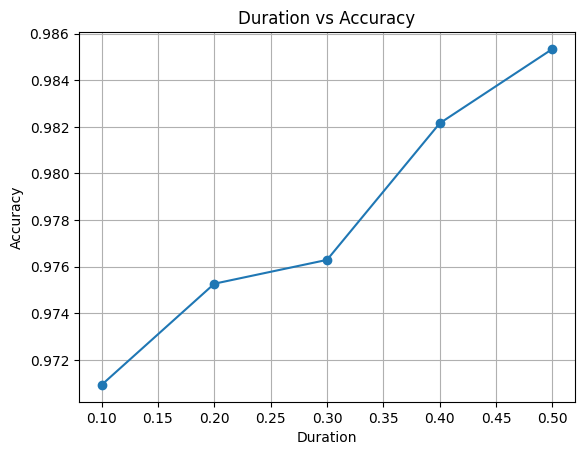

In [51]:
import matplotlib.pyplot as plt


durations = []
accuracies = []

duration_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for duration in duration_range:
    epochs = mne.make_fixed_length_epochs(raw, duration=duration, overlap=0, preload=True)
    
    num_epochs = len(epochs)

    eeg_data = epochs.get_data()

    # condition_ranges = {'lev1': (0, (num_epochs/3)),
    #                     'lev2': ((num_epochs/3) , ((2*num_epochs)/3) ),
    #                     'lev3': ((2*num_epochs)/3 , (num_epochs) )}
    condition_ranges = {'lev1': (0, (num_epochs/6)),
                    'lev2': (3*(num_epochs/6) , 4*((num_epochs)/6) ),
                    'lev3': ( 5*((num_epochs)/6) , (num_epochs) )}

    epochs_by_condition = {}
    selected_epochs = []

    for condition, (start_epoch, end_epoch) in condition_ranges.items():
        start_epoch = int(start_epoch)
        end_epoch = int(end_epoch)
        condition_epochs = epochs[start_epoch:end_epoch+1].copy()
        epochs_by_condition[condition] = condition_epochs
        selected_epochs.append(condition_epochs)

    selected_epochs = mne.concatenate_epochs(selected_epochs)
    import pandas as pd
    import numpy as np
    from scipy.signal import welch
    
    channel_names = epochs.ch_names
    sfreq = epochs.info['sfreq']

    columns = [f'{feature}_{channel}' for feature in ['mean_psd', 'variance_psd', 'standarddev_psd'] for channel in channel_names]
    columns.append('condition')
    feature_df = pd.DataFrame(columns=columns)

    

    append_epoch_data(epochs_by_condition['lev1'], 'lev1')
    append_epoch_data(epochs_by_condition['lev2'], 'lev2')
    append_epoch_data(epochs_by_condition['lev3'], 'lev3')
    # Rename columns using a dictionary
    new_column_names = {
        'mean_psd_Fp1': 'mean_psd_Fp1',
        'mean_psd_Fp2': 'mean_psd_Fp2',
        'mean_psd_C3': 'mean_psd_C3',
        'mean_psd_C4': 'mean_psd_C4',
        'mean_psd_P7': 'mean_psd_P7',
        'mean_psd_P8': 'mean_psd_P8',
        'mean_psd_O1': 'mean_psd_O1',
        'mean_psd_O2': 'mean_psd_O2',
        'mean_psd_F7': 'mean_psd_F7',
        'mean_psd_F8': 'mean_psd_F8',
        'standarddev_psd_Fp1': 'stddev_psd_Fp1',
        'standarddev_psd_Fp2': 'stddev_psd_Fp2',
        'standarddev_psd_C3': 'stddev_psd_C3',
        'standarddev_psd_C4': 'stddev_psd_C4',
        'standarddev_psd_P7': 'stddev_psd_P7',
        'standarddev_psd_P8': 'stddev_psd_P8',
        'standarddev_psd_O1': 'stddev_psd_O1',
        'standarddev_psd_O2': 'stddev_psd_O2',
        'standarddev_psd_F7': 'stddev_psd_F7',
        'standarddev_psd_F8': 'stddev_psd_F8'
    }

    feature_df.rename(columns=new_column_names, inplace=True)

    X = feature_df.drop(columns=['condition'])
    y = feature_df['condition']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    durations.append(duration)
    accuracies.append(accuracy)

plt.plot(durations, accuracies, marker='o')
plt.xlabel('Duration')
plt.ylabel('Accuracy')
plt.title('Duration vs Accuracy')
plt.grid(True)
plt.show()


In [52]:
# import matplotlib.pyplot as plt

# # Initialize lists to store durations and accuracies
# durations = []
# accuracies = []

# # Define a range of durations to try
# duration_range = [0.05,0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,2,3]

# for duration in duration_range:
#     epochs = mne.make_fixed_length_epochs(raw, duration=duration, overlap=0, preload=True)
    
#     num_epochs = len(epochs)

#     eeg_data = epochs.get_data()

#     # condition_ranges = {'lev1': (0, (num_epochs/3)),
#     #                     'lev2': ((num_epochs/3) , ((2*num_epochs)/3) ),
#     #                     'lev3': ((2*num_epochs)/3 , (num_epochs) )}
#     condition_ranges = {'lev1': (0, (num_epochs/6)),
#                     'lev2': (3*(num_epochs/6) , 4*((num_epochs)/6) ),
#                     'lev3': ( 5*((num_epochs)/6) , (num_epochs) )}

#     epochs_by_condition = {}
#     selected_epochs = []

#     for condition, (start_epoch, end_epoch) in condition_ranges.items():
#         start_epoch = int(start_epoch)
#         end_epoch = int(end_epoch)
#         condition_epochs = epochs[start_epoch:end_epoch+1].copy()
#         epochs_by_condition[condition] = condition_epochs
#         selected_epochs.append(condition_epochs)

#     selected_epochs = mne.concatenate_epochs(selected_epochs)
#     import pandas as pd
#     import numpy as np
#     from scipy.signal import welch



    
#     channel_names = epochs.ch_names
#     sfreq = epochs.info['sfreq']  # Sampling frequency

#     columns = [f'{feature}_{channel}' for feature in ['mean_psd', 'variance_psd', 'standarddev_psd'] for channel in channel_names]
#     columns.append('condition')
#     feature_df = pd.DataFrame(columns=columns)

    

#     append_epoch_data(epochs_by_condition['lev1'], 'lev1')
#     append_epoch_data(epochs_by_condition['lev2'], 'lev2')
#     append_epoch_data(epochs_by_condition['lev3'], 'lev3')
#     # Rename columns using a dictionary
#     new_column_names = {
#         'mean_psd_Fp1': 'mean_psd_Fp1',
#         'mean_psd_Fp2': 'mean_psd_Fp2',
#         'mean_psd_C3': 'mean_psd_C3',
#         'mean_psd_C4': 'mean_psd_C4',
#         'mean_psd_P7': 'mean_psd_P7',
#         'mean_psd_P8': 'mean_psd_P8',
#         'mean_psd_O1': 'mean_psd_O1',
#         'mean_psd_O2': 'mean_psd_O2',
#         'mean_psd_F7': 'mean_psd_F7',
#         'mean_psd_F8': 'mean_psd_F8',
#         'standarddev_psd_Fp1': 'stddev_psd_Fp1',
#         'standarddev_psd_Fp2': 'stddev_psd_Fp2',
#         'standarddev_psd_C3': 'stddev_psd_C3',
#         'standarddev_psd_C4': 'stddev_psd_C4',
#         'standarddev_psd_P7': 'stddev_psd_P7',
#         'standarddev_psd_P8': 'stddev_psd_P8',
#         'standarddev_psd_O1': 'stddev_psd_O1',
#         'standarddev_psd_O2': 'stddev_psd_O2',
#         'standarddev_psd_F7': 'stddev_psd_F7',
#         'standarddev_psd_F8': 'stddev_psd_F8'
#     }

#     # Rename columns using the rename() method
#     feature_df.rename(columns=new_column_names, inplace=True)
#     # Ensure the rest of your code is within this loop so that it executes for each duration
    
#     # Train the classifier and calculate accuracy
#     X = feature_df.drop(columns=['condition'])
#     y = feature_df['condition']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

#     # Initialize the Gradient Boosting classifier
#     gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

#     # Train the classifier on the training data
#     gb_classifier.fit(X_train, y_train)

#     # Predict the labels for the test set
#     y_pred = gb_classifier.predict(X_test)

#     # Calculate the accuracy of the model
#     accuracy = accuracy_score(y_test, y_pred)
    
#     # Append duration and accuracy to lists
#     durations.append(duration)
#     accuracies.append(accuracy)

# # Plot duration vs accuracy
# plt.plot(durations, accuracies, marker='o')
# plt.xlabel('Duration')
# plt.ylabel('Accuracy')
# plt.title('Duration vs Accuracy')
# plt.grid(True)
# plt.show()
